# R的可视化 —— ggplot2

> 图片的最大价值在于促使我们发现从未预料到的事情 —— John Tukey

## 使用ggplot2进行数据可视化

### 简介

R有好几种绘图工具，但ggplot2是其中最优雅、功能最全面的一个。ggplot2实现了**图形语法**，这是一套用来描述和构建图形的连贯性语法规则。

### 第一步

导入所需的库

- tidyverse库

- ggplot2库

In [1]:
library(tidyverse)
library(ggplot2)
library(ggrepel)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.0     √ purrr   0.3.3
√ tibble  2.1.3     √ dplyr   0.8.3
√ tidyr   1.0.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'ggrepel' was built under R version 3.6.3"


#### 研究问题

- 引擎与燃油效率的关系？

mpg数据集中，displ表示引擎大小，单位为升；hwy表示汽车在高速公路上行驶时的燃油效率，单位为英里/加仑（mpg）。

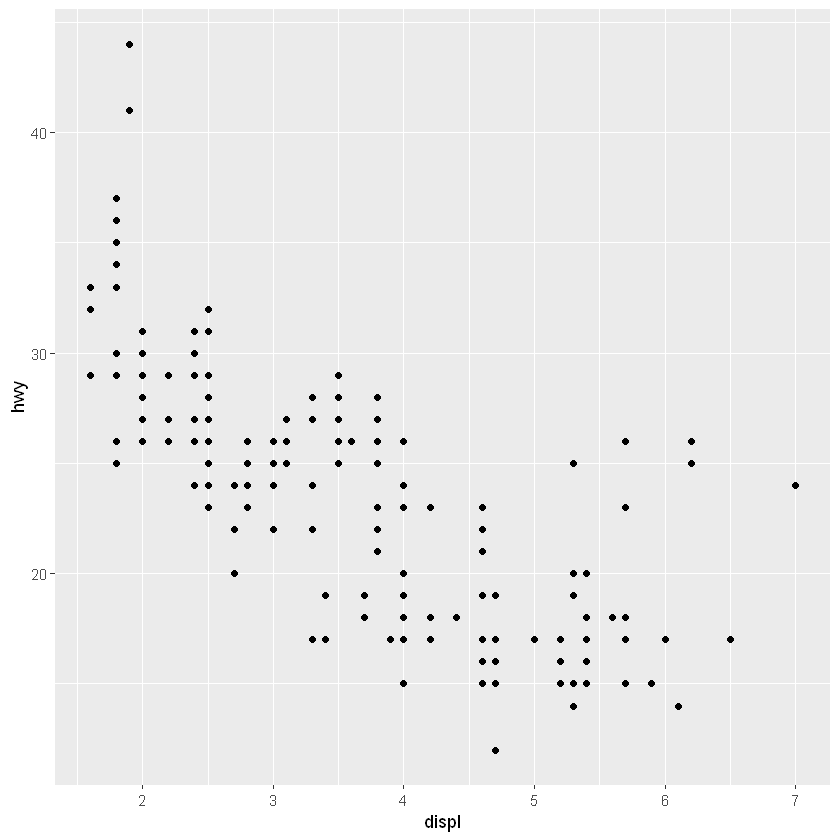

In [2]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

上述代码所做的事

- ggplot()创建一个坐标系，然后就可以添加图层

- geom_point()添加一个点层，它是一个几何对象函数

- ggplot2中的每个集合对象函数都有一个mapping参数，这个参数定义了如何将数据集中的变量映射为图形属性

- mapping参数总是与aes()函数成对出现

#### 绘图模板

基本的绘图模板

```R
ggplot(data = <data>) + <GEOM_FUNCTION>(mapping = aes<MAPPINGS>))
```

### 图形属性映射

- 引擎与燃油效率的关系，与汽车类型是否有关？

mpg数据集中，class表示汽车类型

<br>

如何在图形中包含三个变量的信息？

- 可以使用图形属性映射，把第三个变量映射到图形的颜色、形状等

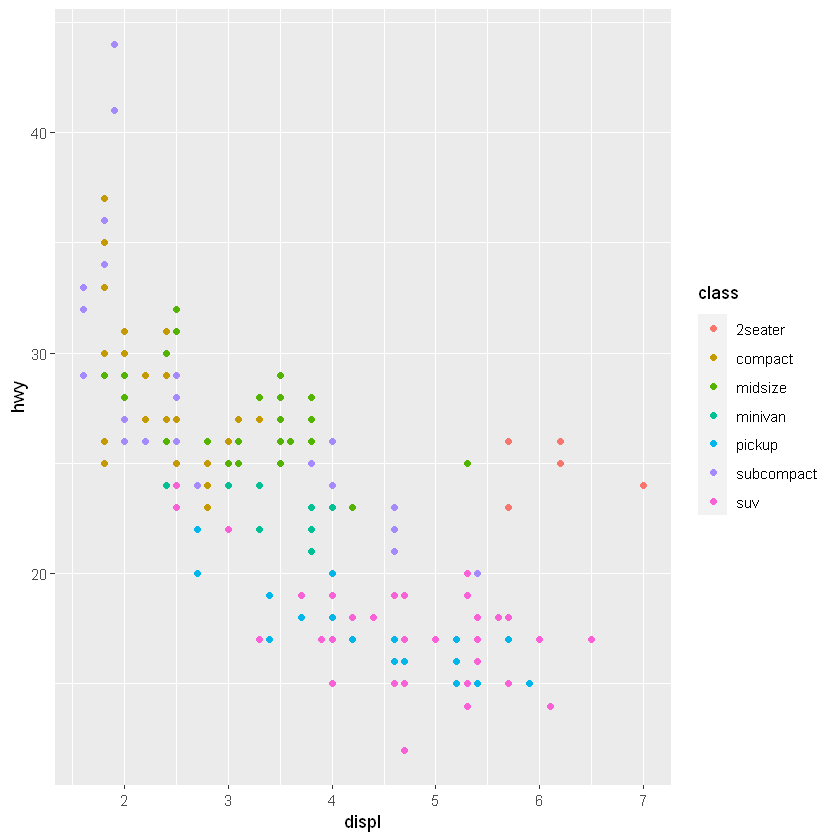

In [3]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = class))

aes()的作用

- 将图形属性名称和变量名称关联起来

- ggplot2自动为每个变量值分配唯一的图形属性水平，这个过程称为**标度变换**

<br>

除了映射为颜色，也可以映射为点的大小。

Warning message:
"Using size for a discrete variable is not advised."


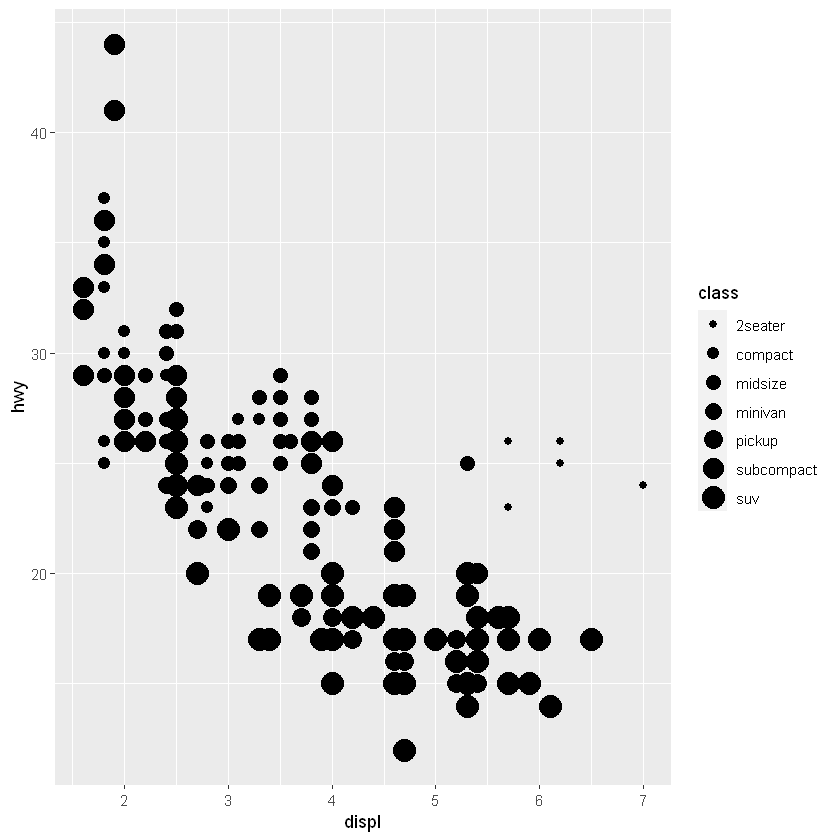

In [4]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, size = class))

但想一想，把类别（无序）变量（class）映射为有序图形属性（size）不是一个好主意。

### 分面 

添加额外变量的另一种方法是将图分割为多个分面，这个方法对于分类变量特别合适。

ggplot2主要使用两个函数

- facet_wrap() —— 通过单个变量对图进行分面

- facet_grid() —— 通过两个变量对图进行分面

这两个函数使用公式作为参数。公式是R中的一种数据结构，它的创建方式是使用~符号，它的左右都可以添加变量。

<br>

对于上述同样的图形，可以用分面的形式来表达。

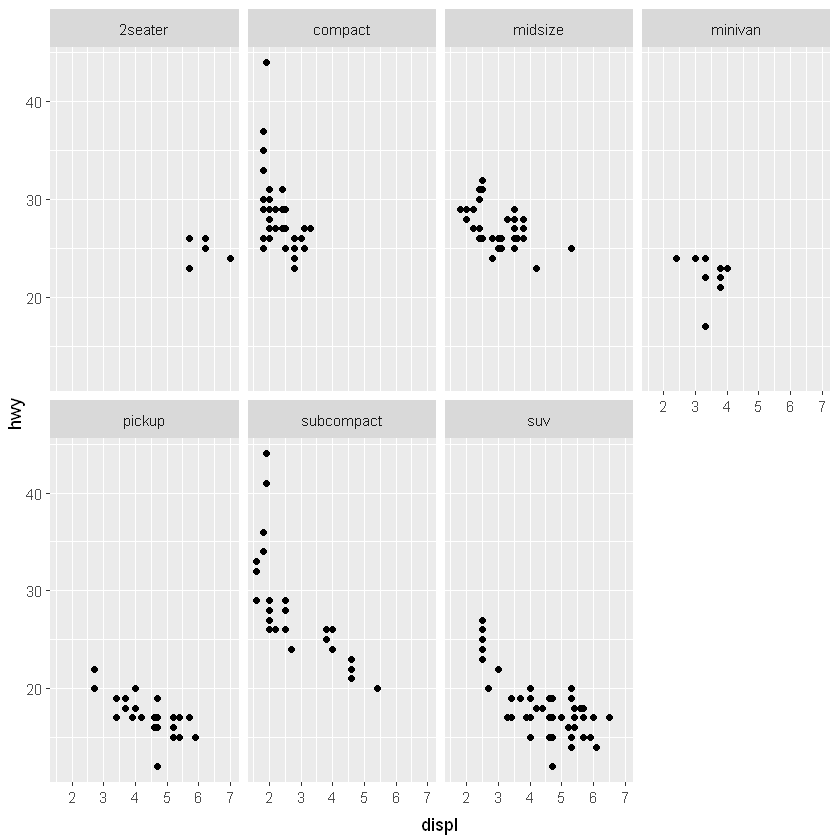

In [5]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy)) + facet_wrap(~ class, nrow = 2)

### 几何对象

**几何对象**是图中用来表示数据的几何图形对象，例如点几何对象。

通过组合不同的几何对象，可以绘制多种多样的图形。

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



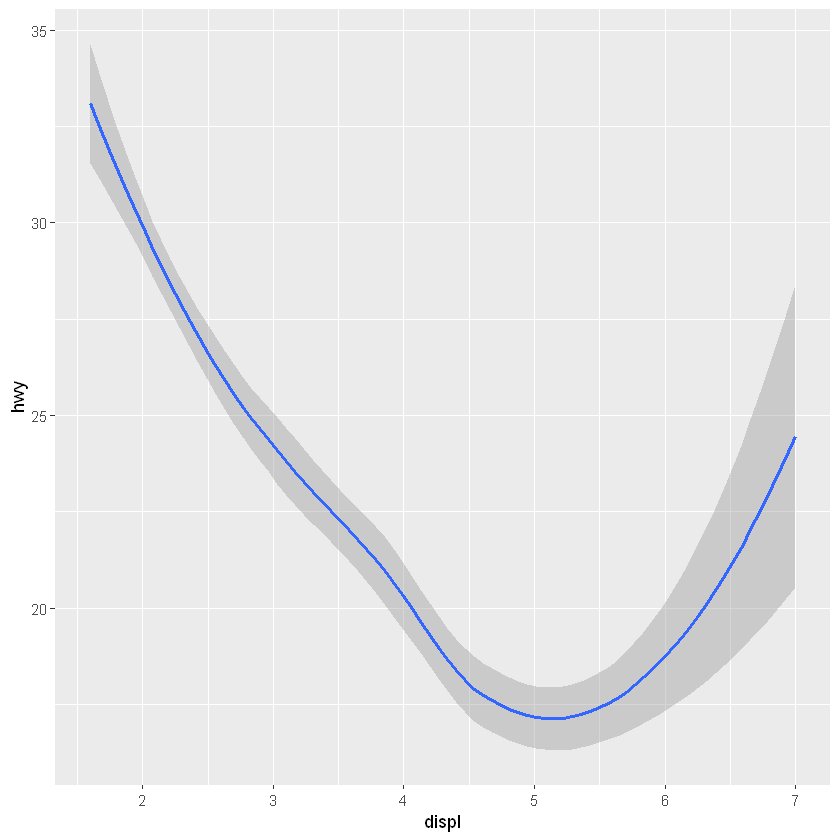

In [6]:
ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



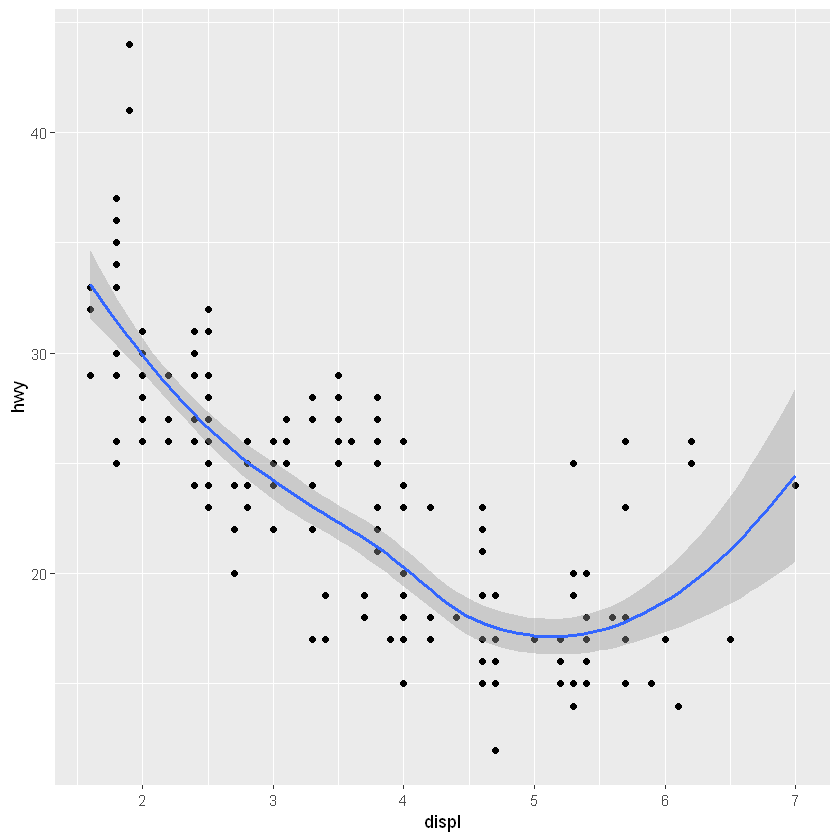

In [7]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



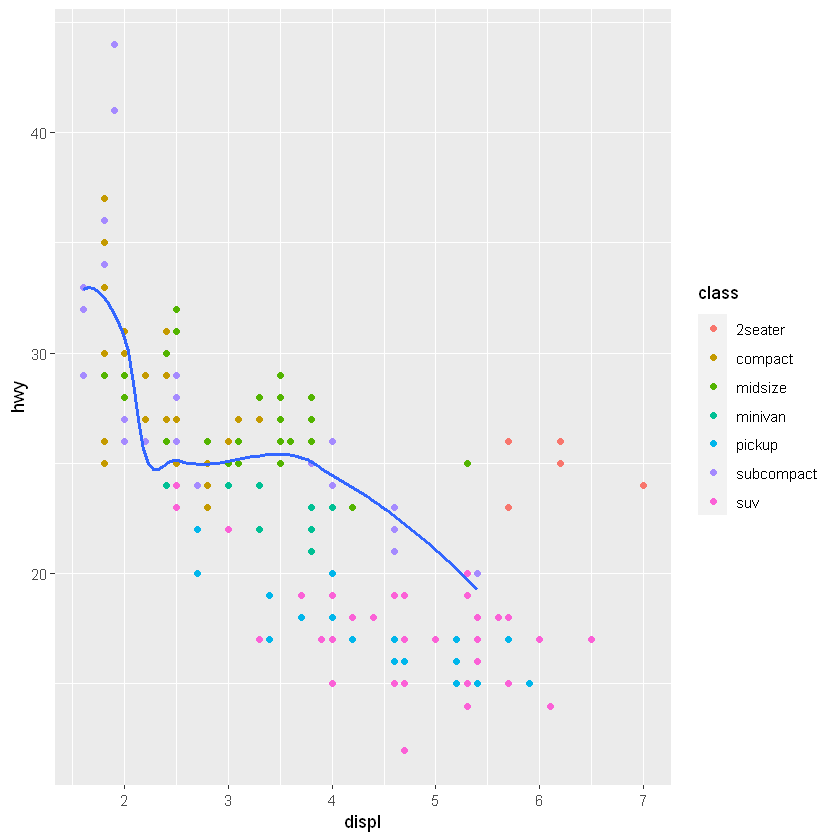

In [8]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point(mapping = aes(color = class)) + 
    geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)

### 统计变换

我们看一下条形图。

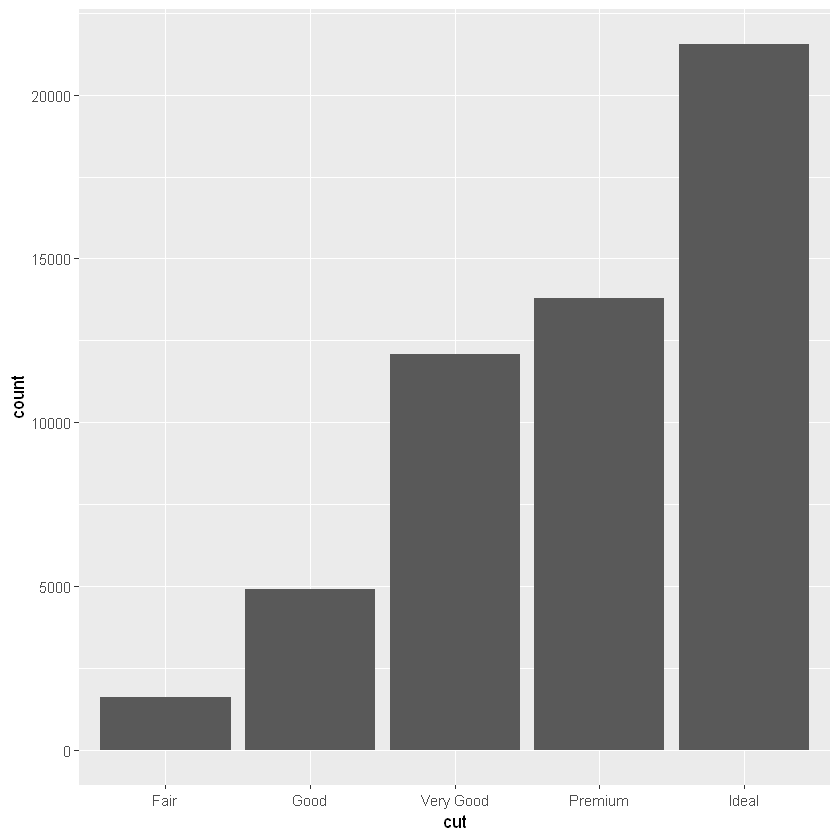

In [9]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut))

其中y轴变量count并不在数据集diamonds中，它来自哪里呢？事实上，一些图形会绘制计算出来的新数据。

绘图时用来计算新数据的算法称为stat（统计变换）。几何对象函数对应特定的统计变换函数，它们可以互换使用。

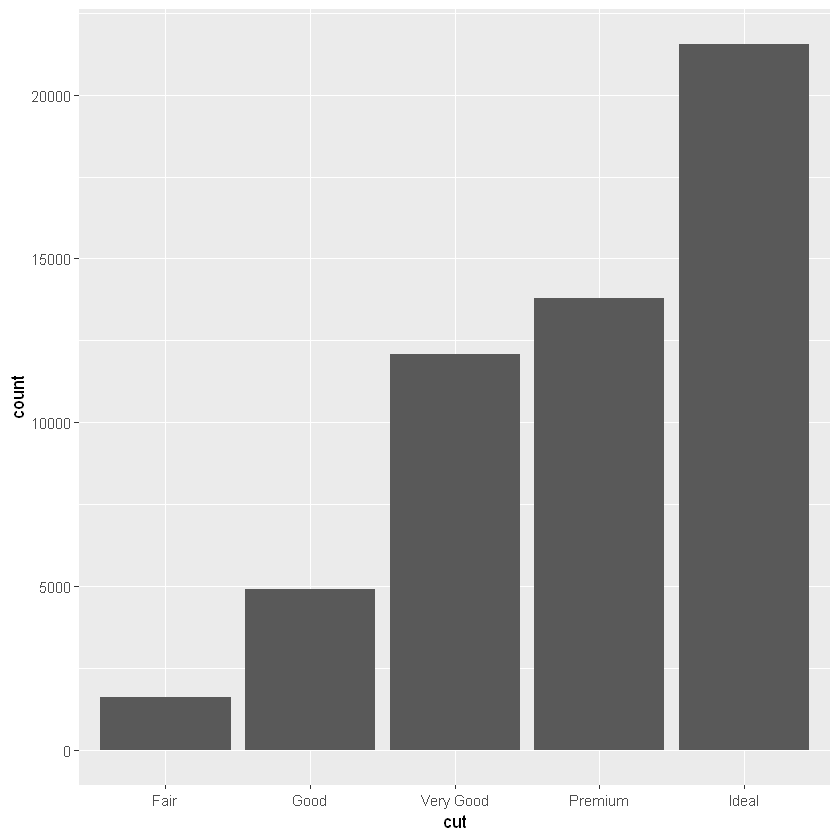

In [10]:
ggplot(data = diamonds) + stat_count(mapping = aes(x = cut))

当然，我们也可以显式使用某种统计变换。它可以覆盖默认的统计变量。

例如，使用自己数据集中的变量绘制柱状图。

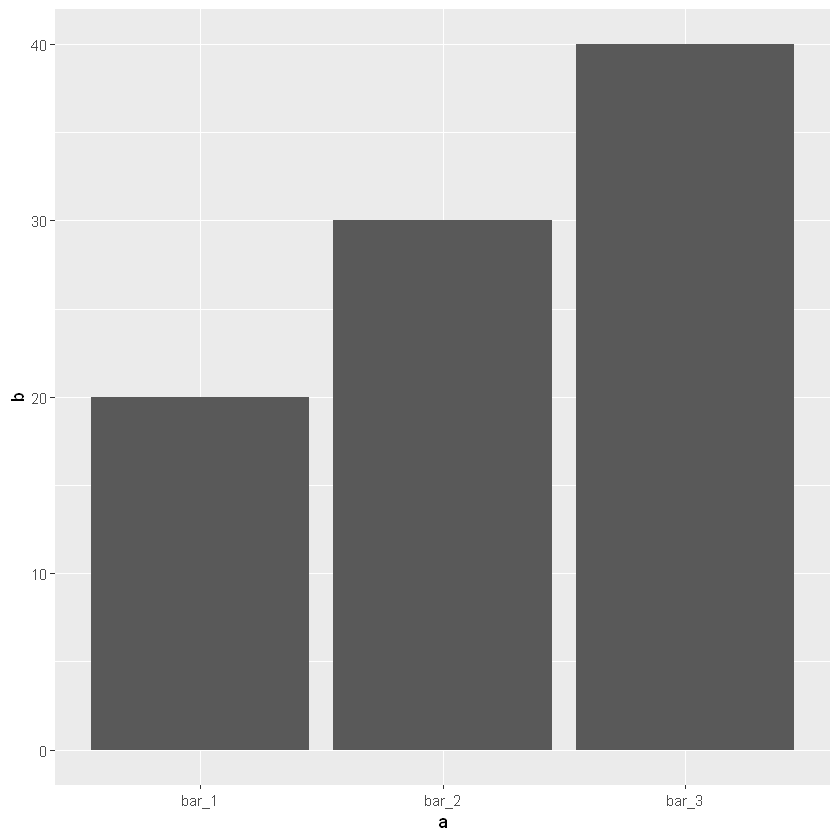

In [11]:
demo <- tribble(
    ~a, ~b,
    "bar_1", 20,
    "bar_2", 30,
    "bar_3", 40
)

ggplot(data = demo) + geom_bar(mapping = aes(x = a, y = b), stat = "identity")

### 位置调整

可以将fill图形属性映射到另一个变量（如clarity），就可以构建堆叠图形。

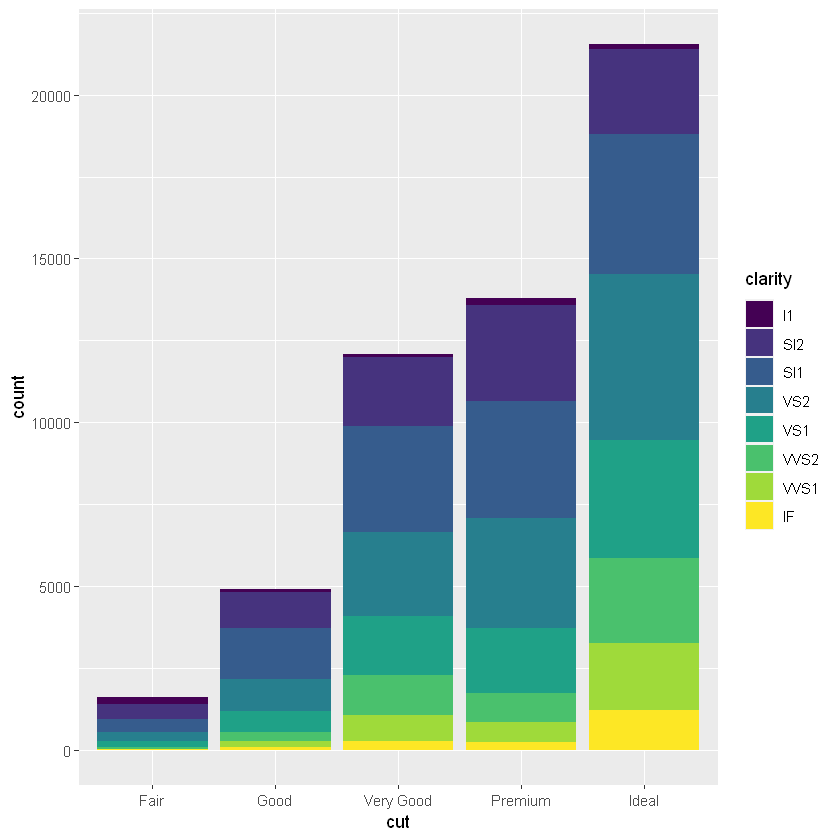

In [12]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity))

通过位置调整，可以生成不同的图形

position可以设置

- identity
- fill
- dodge

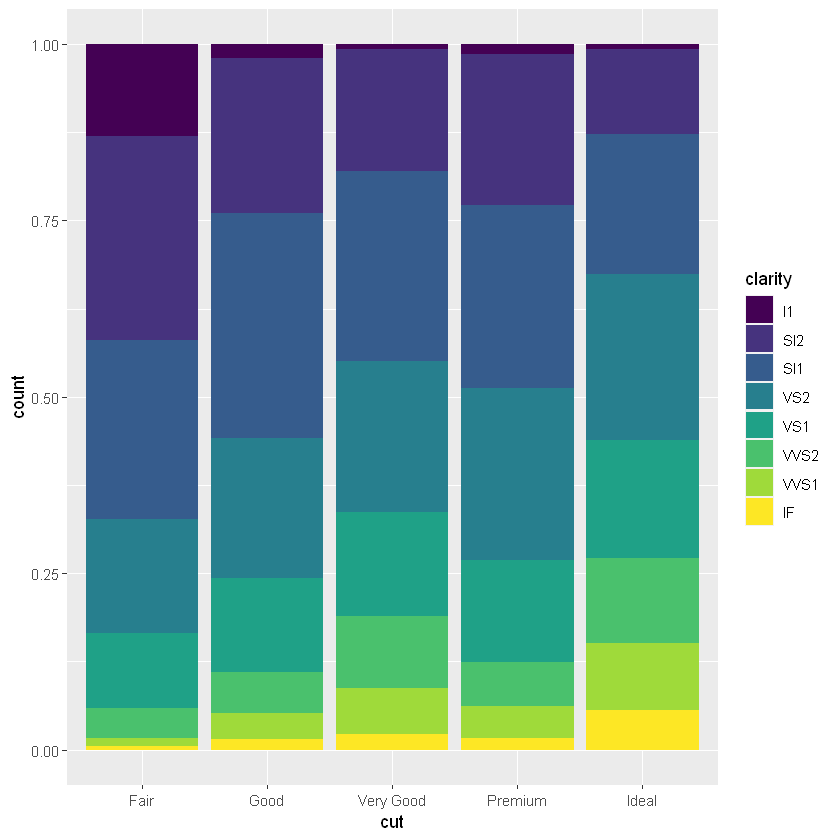

In [13]:
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) + geom_bar(position = "fill")

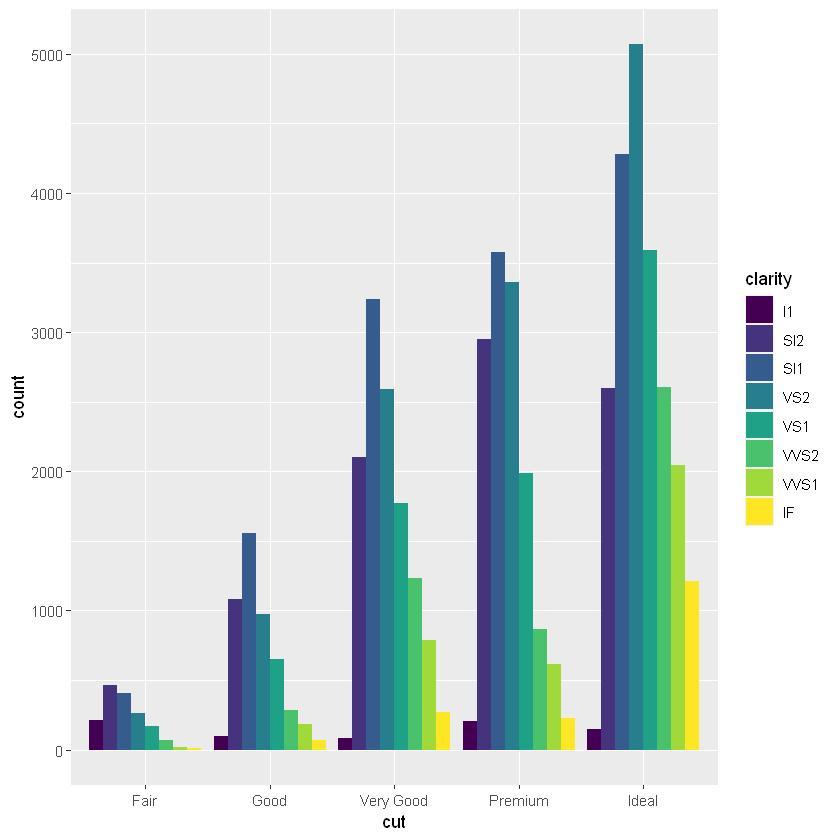

In [14]:
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) + geom_bar(position = "dodge")

对于密集的散点图，可以将位置调整方式设为"jitter"，它为每个数据点添加一个很小的随机扰动，这样就可以将重叠的点分散开来。

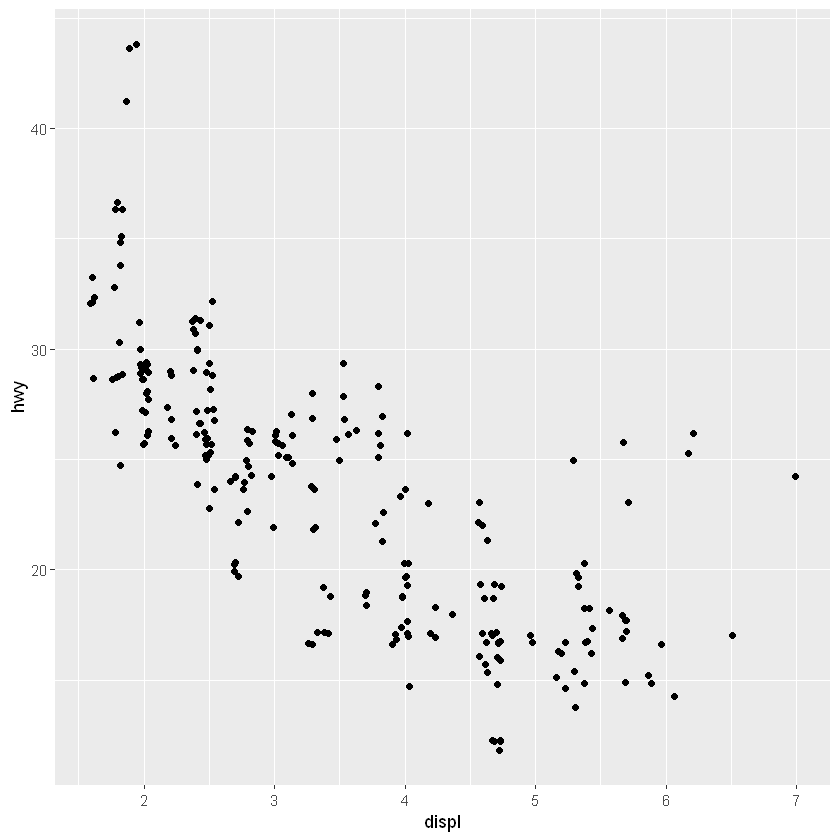

In [15]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

### 坐标系

默认的坐标系是笛卡尔直角坐标系，ggplot2包提供一些其他类型的坐标系

- coord_flip()函数可以交换x轴和y轴

- coord_polar()函数使用极坐标系

### 图形分层语法

模板

```R
ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(
        mapping = aes(<MAPPINGS>)，
        stat = <STAT>,
        position = <POSITION>
    )
    <COORDINATE_FUNCTION> +
    <FACET_FUNCTION>
```

## 使用ggplot2进行图形化沟通

### 标签

我们可以通过labs()函数来添加标签。

- title - 添加标题
- subtitle - 添加子标题
- caption - 图形右下角添加文本，常用语描述数据来源
- x - x轴的标题
- y - y轴的标题

还可以在标题中使用数学公式代替字符串文本，用quote()函数代替""。

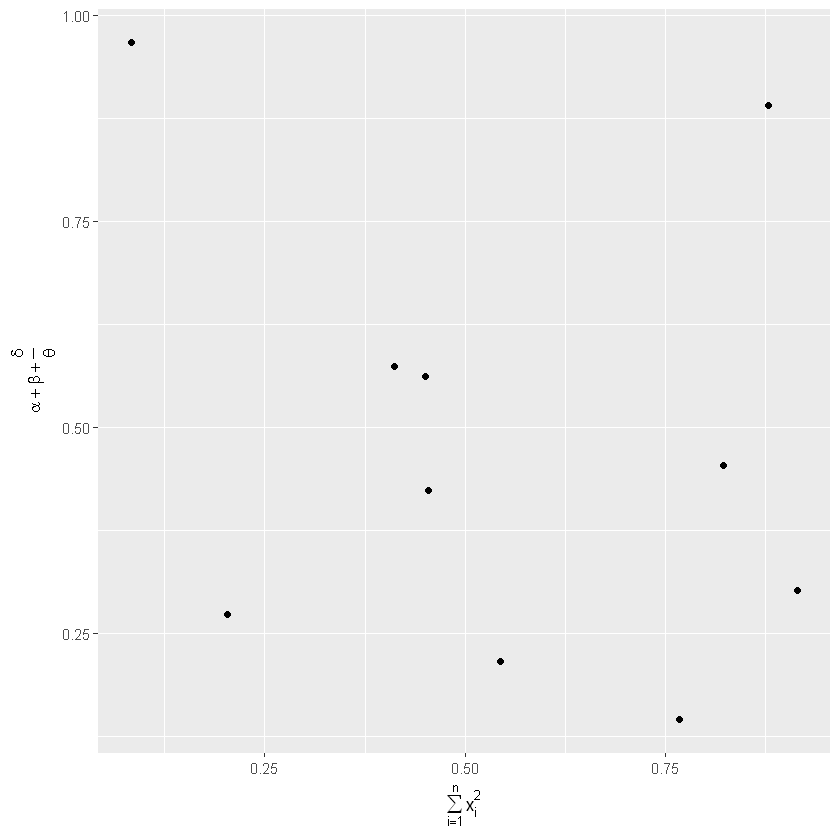

In [16]:
df <- tibble(x = runif(10), y = runif(10))

ggplot(df, aes(x, y)) + 
    geom_point() + 
    labs(
        x = quote(sum(x[i] ^ 2, i == 1, n)),
        y = quote(alpha + beta + frac(delta, theta))
    )

### 注释

为单个观测值或分组观测添加标签，可以使用geom_text()函数。

下列例子标识每类汽车中效率最高的型号。

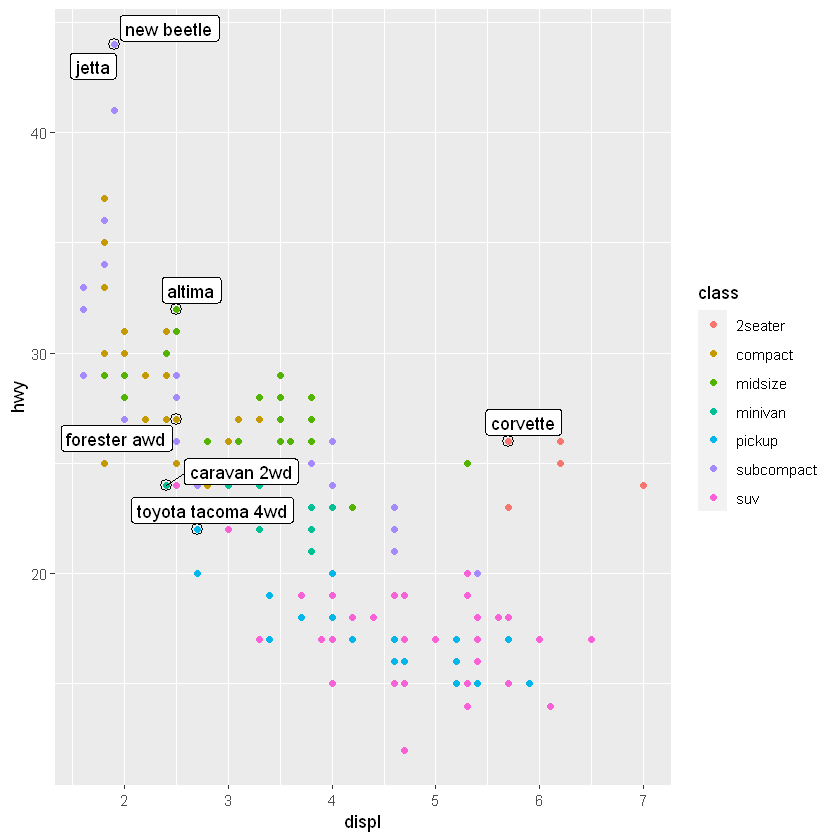

In [17]:
best_in_class <- mpg %>%
    group_by(class) %>%
    filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = class)) + 
    geom_point(size = 3, shape = 1, data = best_in_class) +
    ggrepel::geom_label_repel(
        aes(label = model),
        data = best_in_class
    )

### 标度

一般情况下，ggplot2会自动向图表中添加标度。例如，如果输入以下代码

```R
ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = class))
```

ggplot2会自动在后台为代码添加默认标度

```R
ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = class)) +
    scale_x_continuous() +
    scale_y_continuous() +
    scale_color_discrete()
```

#### 坐标轴刻度与图例项目

影响坐标轴刻度与图例项目外观的主要参数

- breaks —— 控制坐标轴刻度的位置
- labels —— 控制与每个坐标轴刻度或图例项目相关的文本标签

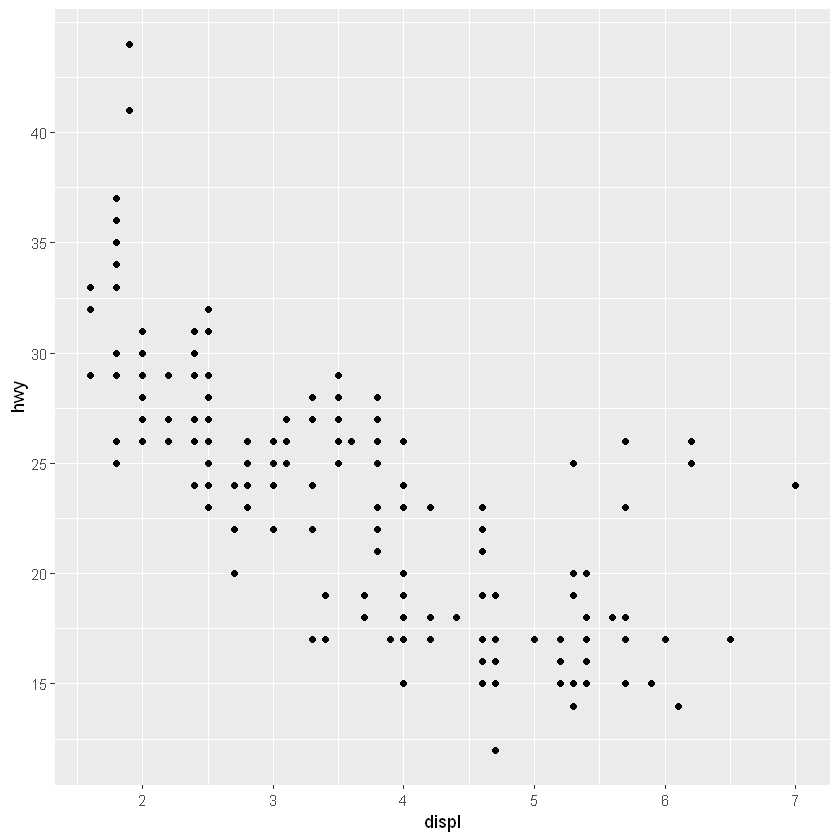

In [18]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    scale_y_continuous(breaks = seq(15, 40, by = 5))

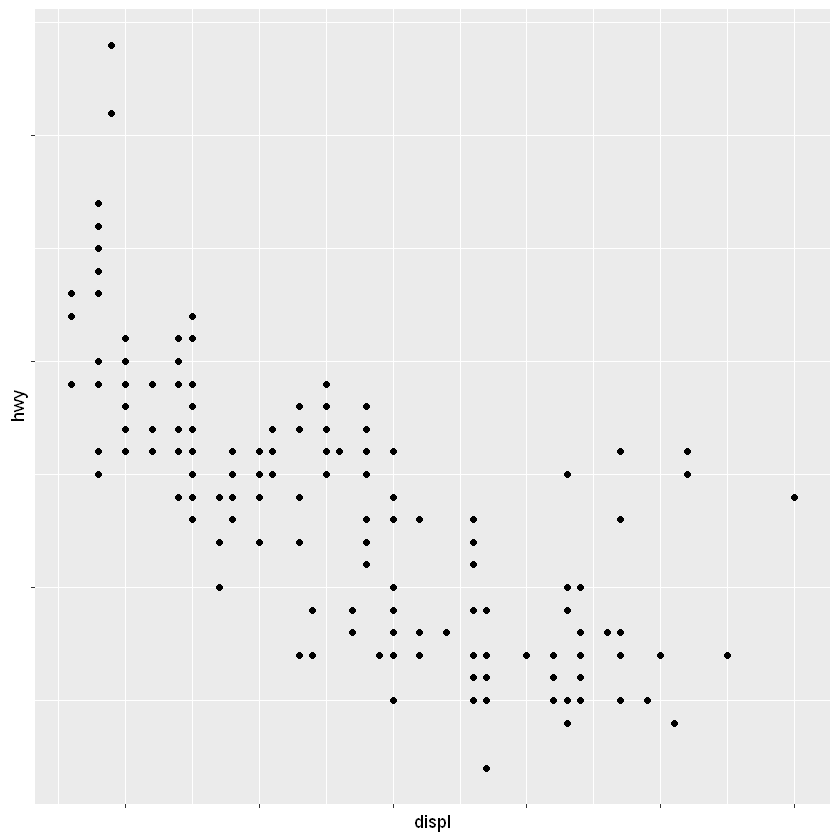

In [19]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    scale_y_continuous(labels = NULL) + 
    scale_x_continuous(labels = NULL)

#### 图例布局

可以使用theme()函数进行设置，控制图例的整体位置。

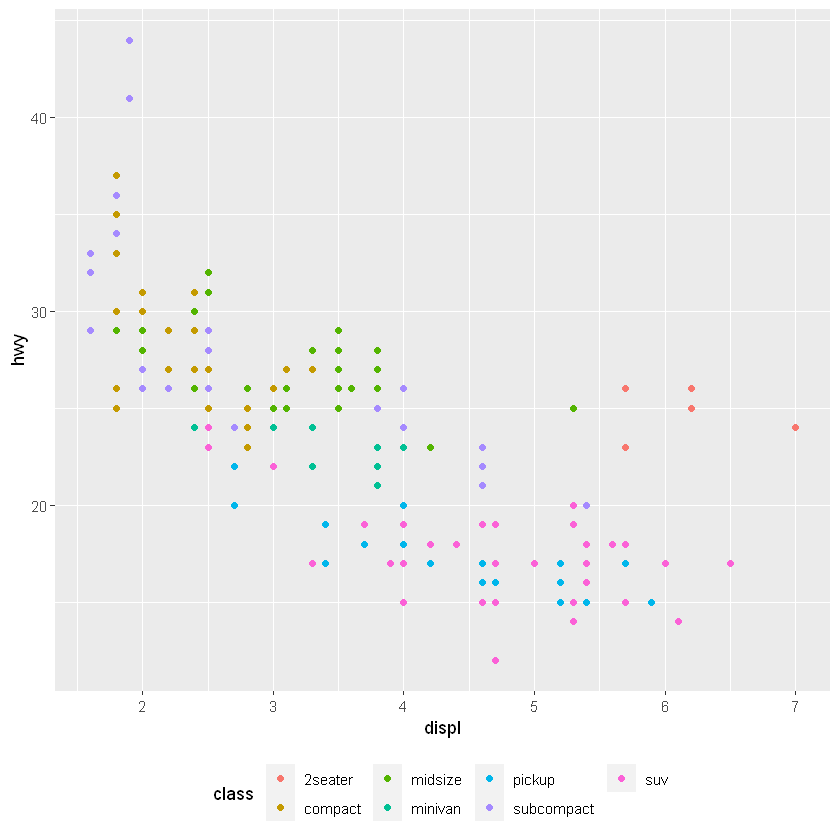

In [20]:
base <- ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class))

base + theme(legend.position = "bottom")

要想控制单个图例的显示，可以配合guide_legend()或guide_colorbar()函数来使用guides()函数。

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



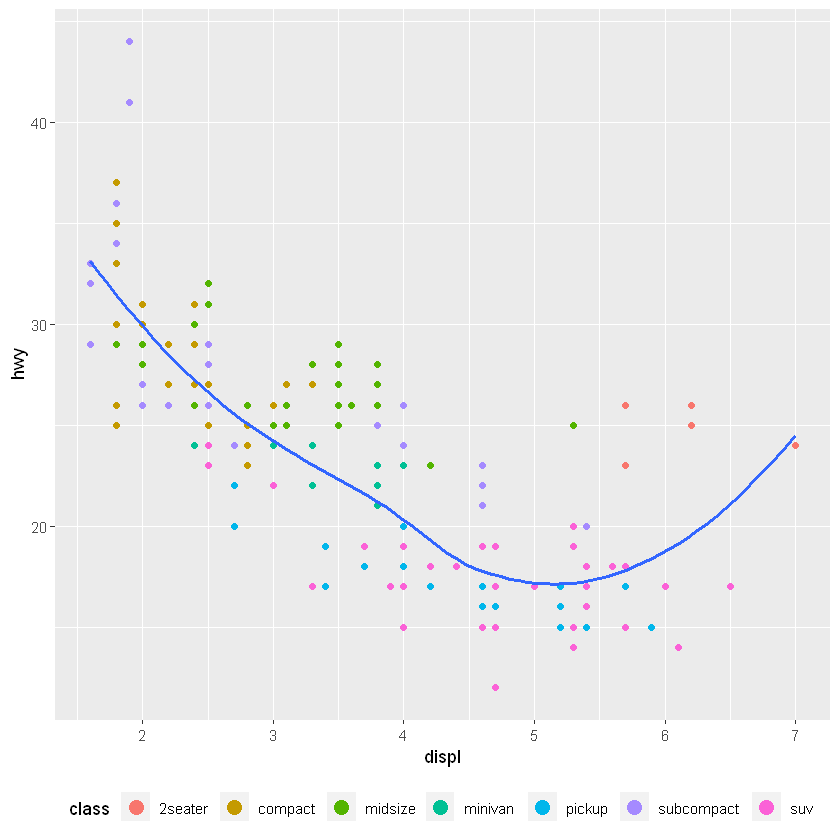

In [21]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class)) +
    geom_smooth(se = FALSE) +
    theme(legend.position = "bottom") +
    guides(
        color = guide_legend(
            nrow = 1,
            override.aes = list(size = 4)
        )
    )


#### 标度替换

经常需要进行替换的两种标度

- 连续性位置标度

- 颜色标度

默认分类标签以一种非常均匀的方式在色环上选择颜色。常用的另一种配色方式是使用ColorBrewer标度。

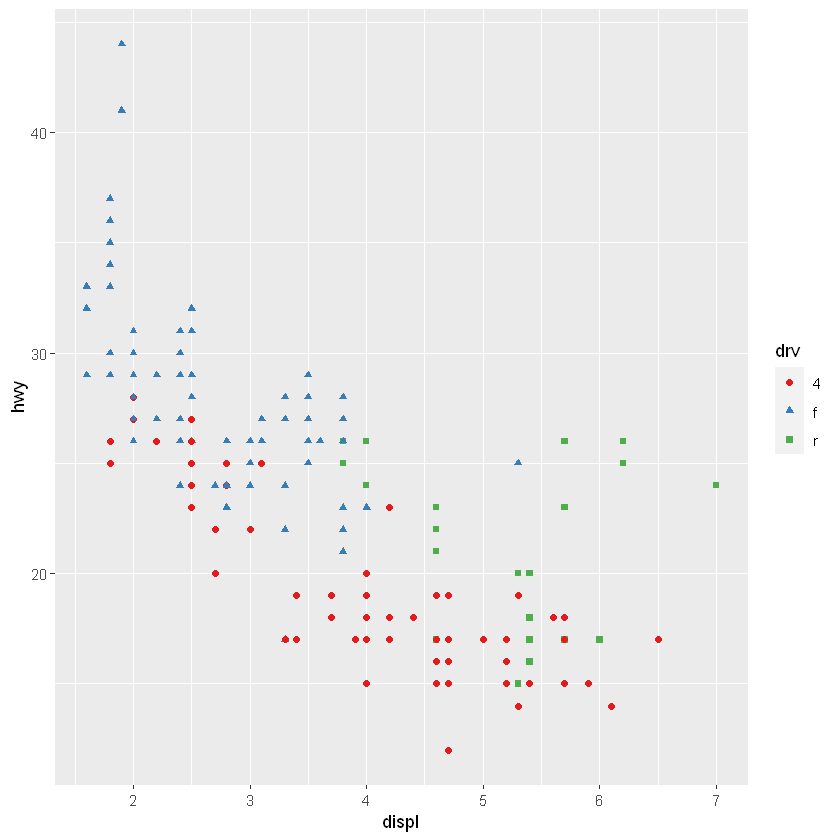

In [22]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = drv, shape = drv)) +
    scale_color_brewer(palette = "Set1")

如果预先确定了数据值和颜色间的映射，那么可以使用scale_color_manual()函数。

例如，我们可以将总统的党派映射到颜色，使用红色代表共和党，蓝色代表民主党。

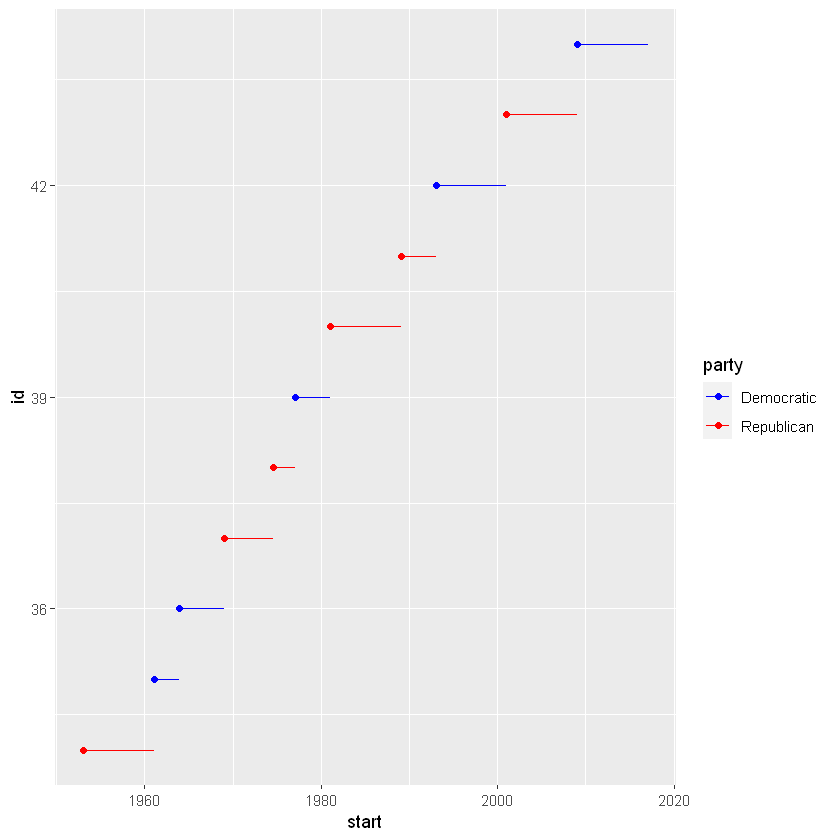

In [23]:
presidential %>%
    mutate(id = 33 + row_number()) %>%
    ggplot(aes(start, id, color = party)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_colour_manual(
        values = c(Republican = "red", Democratic = "blue")
    )

另一个可以选用的函数是由viridis包提供的scale_color_viridis()，它是对ColorBrewer分类标度的一种连续模拟。

### 缩放

控制图形范围的方法有3种

- 调整绘图所用数据
- 设置标度范围
- 在coord_cartesian()函数中设置xlim和ylim参数值

想要放大图形的一片区域，最好使用coord_cartesian()函数

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



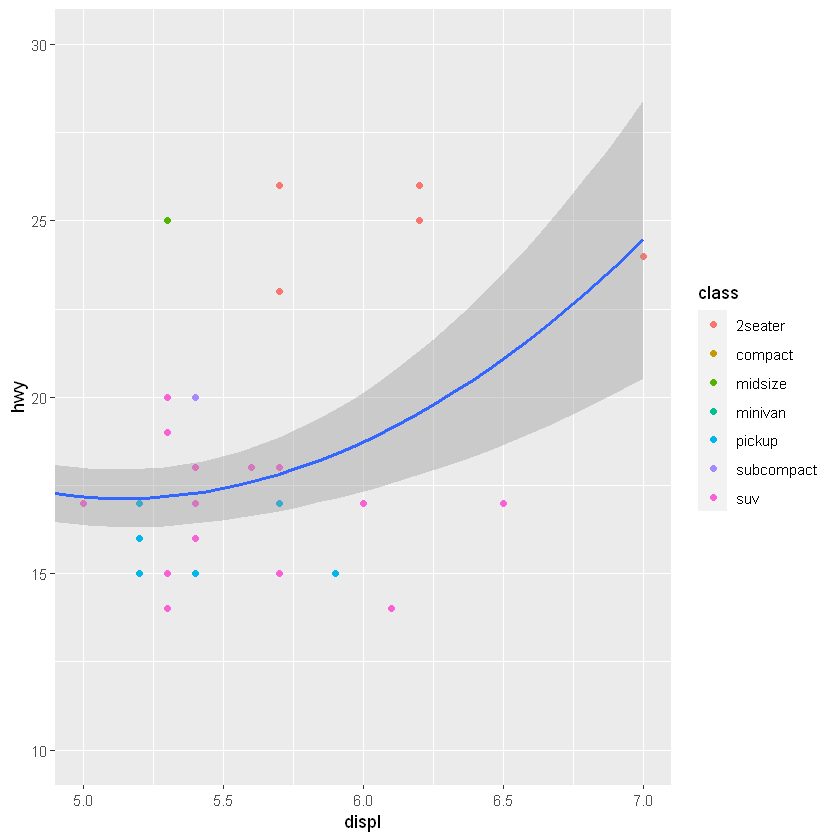

In [24]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class)) +
    geom_smooth() +
    coord_cartesian(xlim = c(5, 7), ylim = c(10, 30))

如果要比较不同类型汽车的数据，并想分别绘制出来，需要统一标度，可以采用如下方式

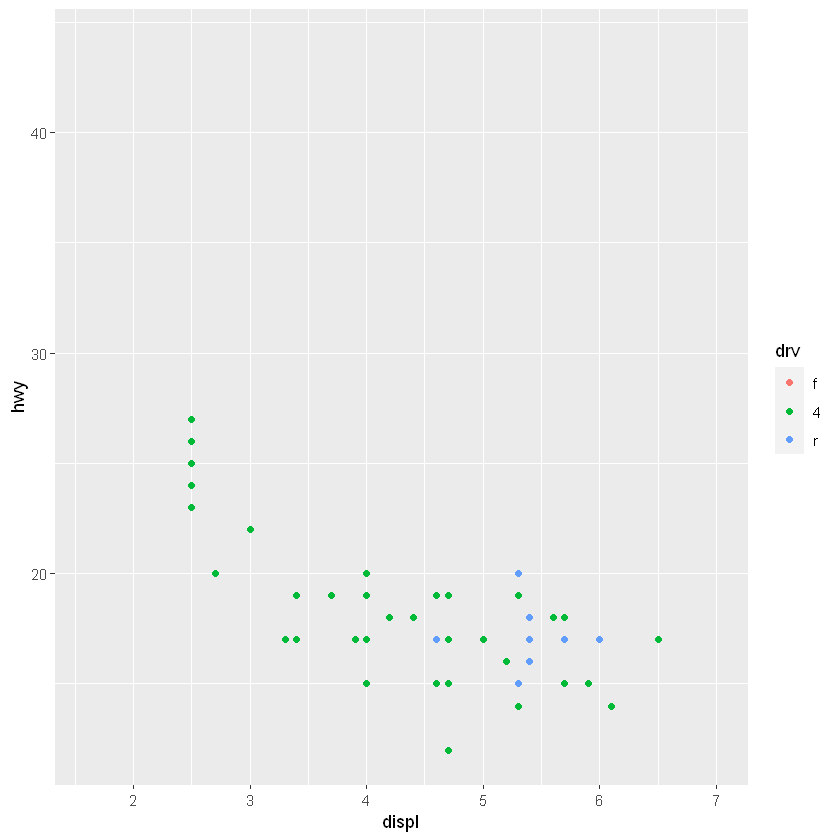

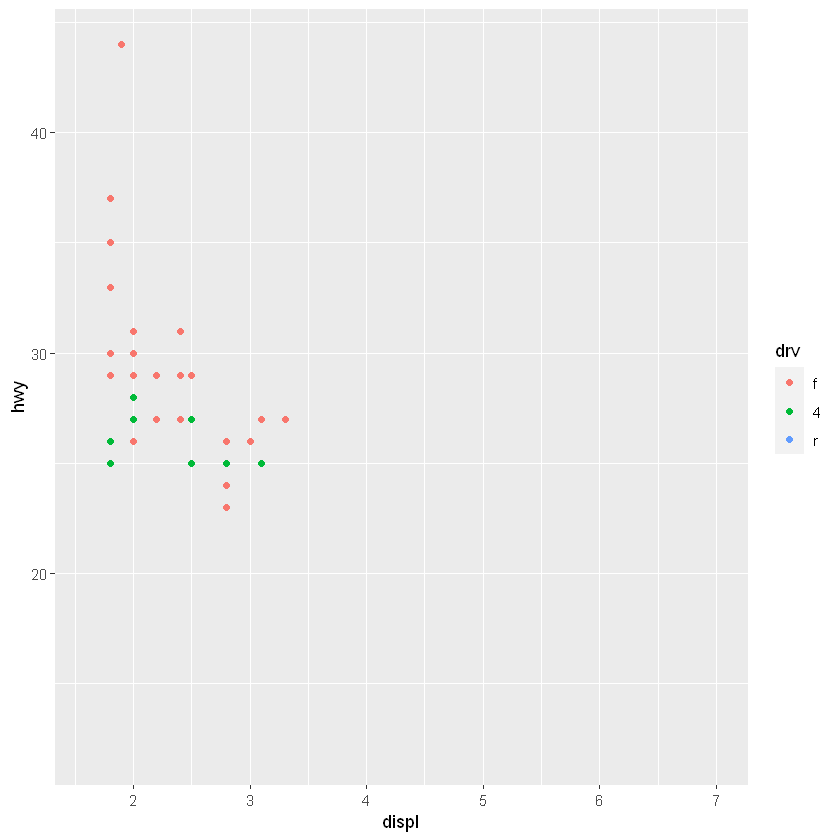

In [25]:
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")

x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_color_discrete(limits = unique(mpg$drv))

ggplot(suv, aes(displ, hwy, color = drv)) + geom_point() + x_scale + y_scale + col_scale
ggplot(compact, aes(displ, hwy, color = drv)) + geom_point() + x_scale + y_scale + col_scale

### 保存图形

保存图片主要有两种方式

- ggsave()
- knitr

#### 图形大小

在R Markdown中，关于图形的最大问题是如何确定其大小和形状。控制图形大小的选项主要有5个：fig.width、fig.height、fig.asp、out.width和out.height.

这里只使用以上5种选项中的3种

- 宽度一致的图形是令人赏心悦目的。设置图形的默认参数是fig.width = 6 （6英寸）和fig.asp = 0.618 （黄金分割点）

- 使用out.width控制输出图形的大小，并将其设置为行宽的百分比。默认设置为out.width = "70%"和fig.align = "center"。

- 如果想在一行放置多个图形，可以将out.width设置为50%以放置两个图形，同时还要设置fig.align = "default"。

#### 其他重要选项

当代码和文本混合时，建议设置fig.show = "hold"，以使得图形显示在代码后面。

如果想要为图形添加说明文字，可以使用fig.cap。

In [26]:
options(repos=structure(c(CRAN="https://mirrors.tuna.tsinghua.edu.cn/CRAN/"))) 

# R图形进阶

## [ggstatsplot](https://github.com/IndrajeetPatil/ggstatsplot)

Enhancing `ggplot2` plots with statistical analysis.

安装
```R
install.packages(pkgs = "ggstatsplot")
```

In [4]:
library(ggplot2)
library(ggstatsplot)

### `ggbetweenstats`

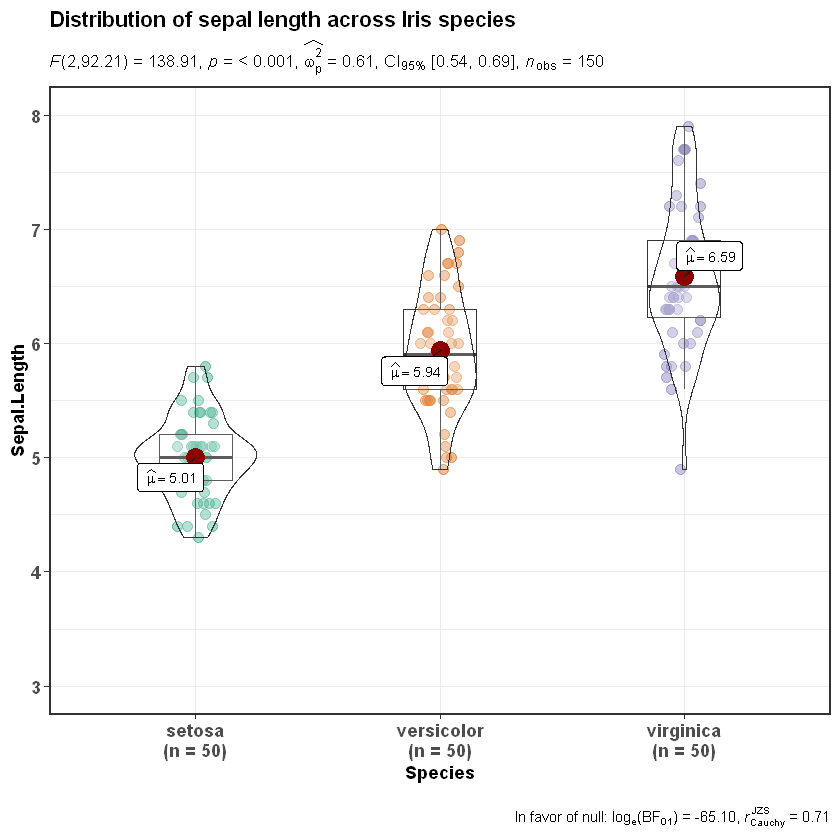

In [5]:
# loading needed libraries
library(ggstatsplot)

# for reproducibility
set.seed(123)

# plot
ggstatsplot::ggbetweenstats(
  data = iris,
  x = Species,
  y = Sepal.Length,
  title = "Distribution of sepal length across Iris species",
  messages = FALSE
) + # further modification outside of ggstatsplot
  ggplot2::coord_cartesian(ylim = c(3, 8)) +
  ggplot2::scale_y_continuous(breaks = seq(3, 8, by = 1))

## [waffle](https://github.com/hrbrmstr/waffle)

Create Waffle Chart Visualizations.

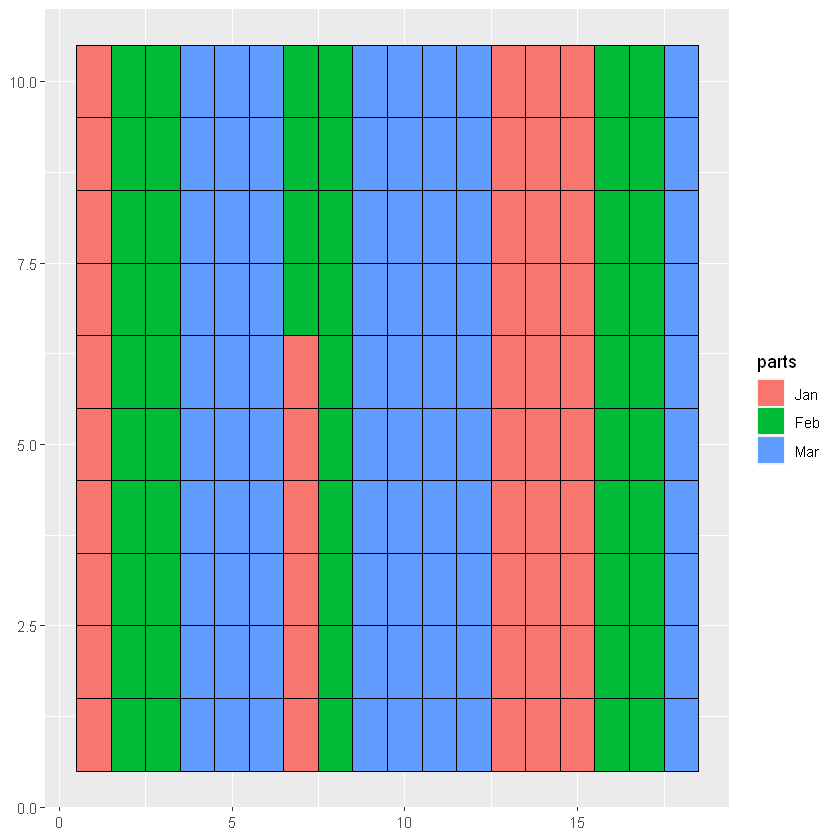

In [19]:
library(waffle)
library(magrittr)
library(hrbrthemes)
library(ggplot2)
library(dplyr)
library(waffle)

data.frame(
  parts = factor(rep(month.abb[1:3], 3), levels=month.abb[1:3]),
  vals = c(10, 20, 30, 6, 14, 40, 30, 20, 10),
  fct = c(rep("Thing 1", 3), rep("Thing 2", 3), rep("Thing 3", 3))
) -> xdf

ggplot(xdf, aes(fill = parts, values = vals)) +
  geom_waffle()

## [ggalt](https://github.com/hrbrmstr/ggalt)

In [22]:
library(ggplot2)
library(gridExtra)
library(ggalt)

# current verison
packageVersion("ggalt")
## [1] '0.6.1'

set.seed(1492)
dat <- data.frame(x=c(1:10, 1:10, 1:10),
                  y=c(sample(15:30, 10), 2*sample(15:30, 10), 3*sample(15:30, 10)),
                  group=factor(c(rep(1, 10), rep(2, 10), rep(3, 10)))
)

[1] '0.4.0'

Bandwidth not specified. Using '0.14', via KernSmooth::dpik.



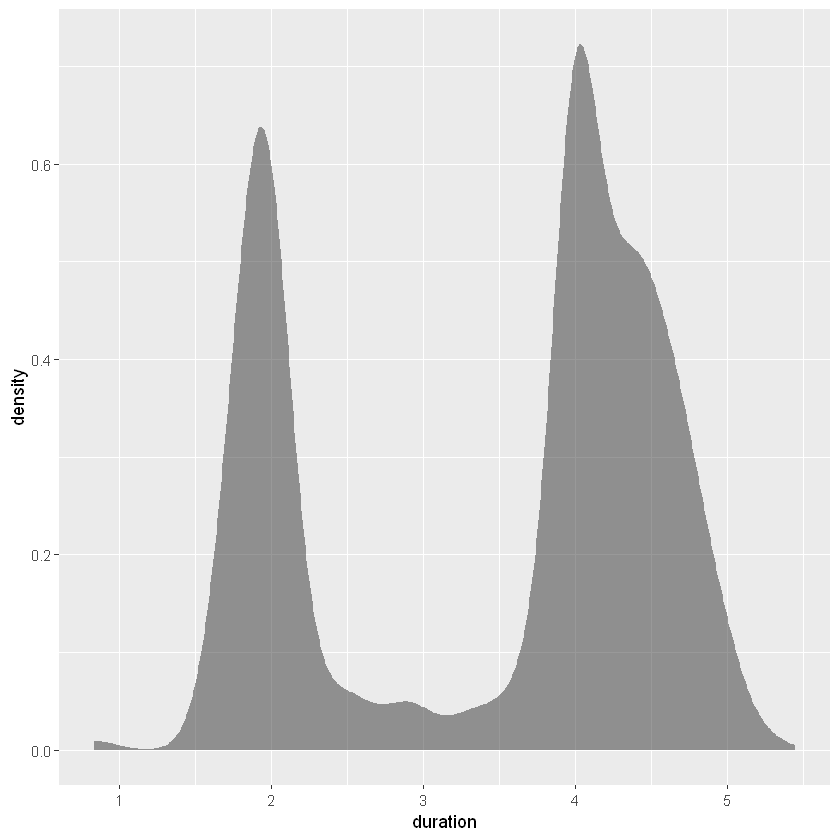

In [24]:
data(geyser, package="MASS")

ggplot(geyser, aes(x=duration)) + 
  stat_bkde(alpha=1/2)

## [UpSetR](https://github.com/hms-dbmi/UpSetR)

### 基本用法

#### Example 1: Alternative Input Formats

In [27]:
library(UpSetR)

movies <- read.csv(system.file("extdata", "movies.csv", package = "UpSetR"), 
    header = T, sep = ";")

In [28]:
# example of list input (list of named vectors)
listInput <- list(one = c(1, 2, 3, 5, 7, 8, 11, 12, 13), two = c(1, 2, 4, 5, 
    10), three = c(1, 5, 6, 7, 8, 9, 10, 12, 13))

# example of expression input
expressionInput <- c(one = 2, two = 1, three = 2, `one&two` = 1, `one&three` = 4, 
    `two&three` = 1, `one&two&three` = 2)

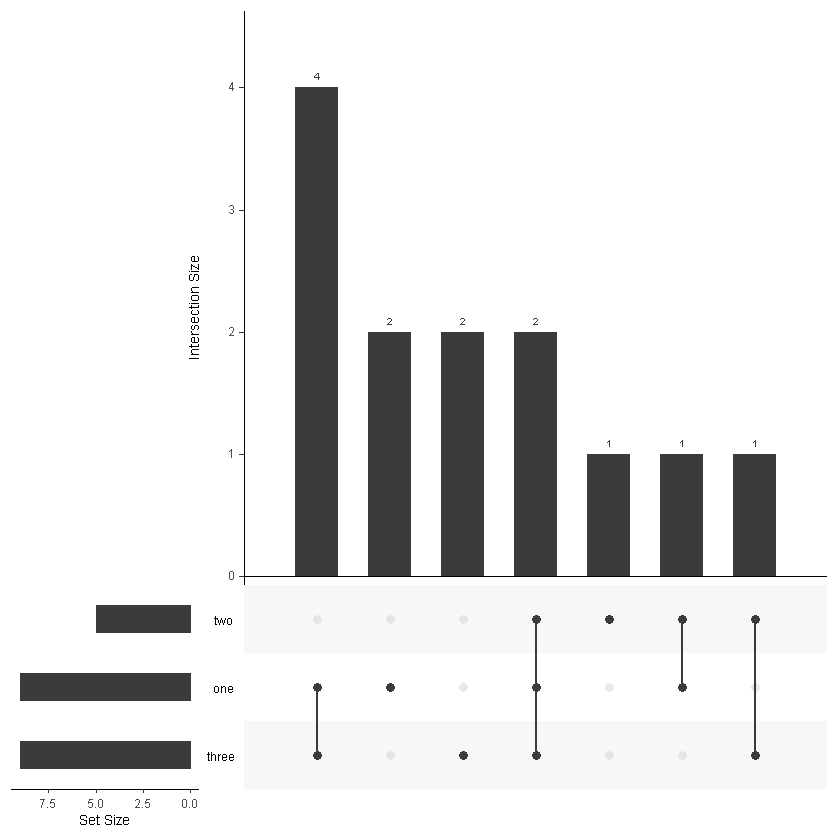

In [29]:
upset(fromList(listInput), order.by = "freq")

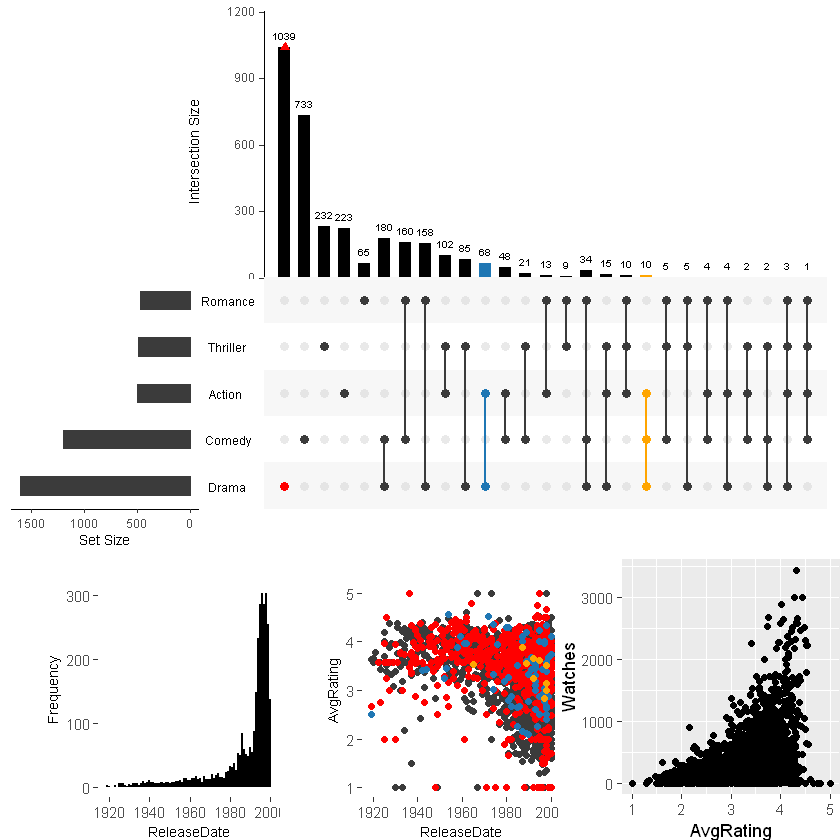

In [31]:
myplot <- function(mydata, x, y) {
    plot <- (ggplot(data = mydata, aes_string(x = x, y = y, colour = "color")) + 
        geom_point() + scale_color_identity() + theme(plot.margin = unit(c(0, 
        0, 0, 0), "cm")))
}

upset(movies, main.bar.color = "black", mb.ratio = c(0.5, 0.5), queries = list(list(query = intersects, 
    params = list("Drama"), color = "red", active = F), list(query = intersects, 
    params = list("Action", "Drama"), active = T), list(query = intersects, 
    params = list("Drama", "Comedy", "Action"), color = "orange", active = T)), 
    attribute.plots = list(gridrows = 50, plots = list(list(plot = histogram, 
        x = "ReleaseDate", queries = F), list(plot = scatter_plot, x = "ReleaseDate", 
        y = "AvgRating", queries = T), list(plot = myplot, x = "AvgRating", 
        y = "Watches", queries = F)), ncols = 3))

## [ggfortify](https://github.com/sinhrks/ggfortify)

This package offers `fortify` and `autoplot` functions to allow automatic `ggplot2` to visualize statistical result of popular R packages. 

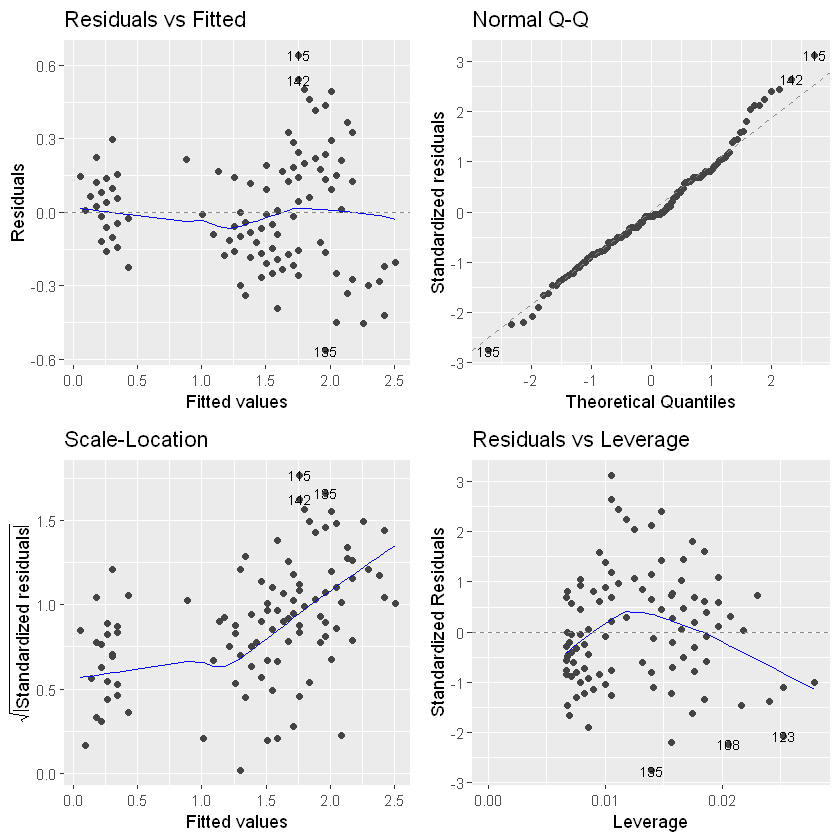

In [33]:
library(ggfortify)
autoplot(lm(Petal.Width ~ Petal.Length, data = iris), label.size = 3)

## [ggally](https://github.com/ggobi/ggally)

In [36]:
library(GGally)

state <- as.data.frame(state.x77)
colnames(state)[c(4, 6)] <- c("Life.Exp", "HS.Grad")
str(state)

'data.frame':	50 obs. of  8 variables:
 $ Population: num  3615 365 2212 2110 21198 ...
 $ Income    : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy: num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp  : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder    : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad   : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost     : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area      : num  50708 566432 113417 51945 156361 ...


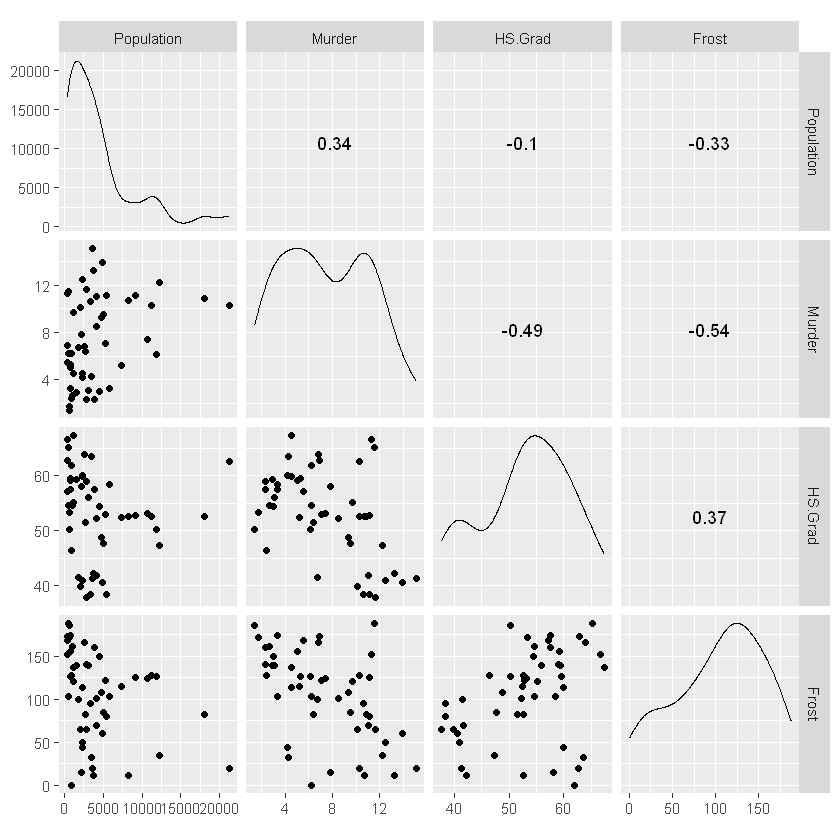

In [37]:
# look at variables for high correlation (none)
ggscatmat(state, columns = c("Population", "Murder", "HS.Grad", "Frost"))

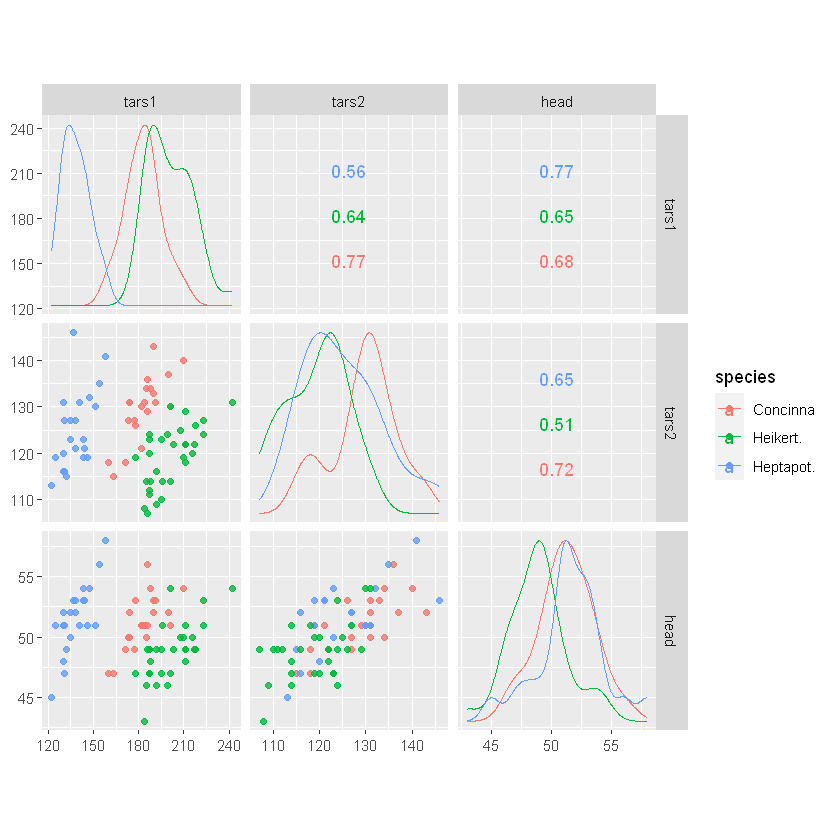

In [38]:
data(flea)
ggscatmat(flea, columns = 2:4, color="species", alpha=0.8)

## [ggExtra](https://github.com/daattali/ggExtra)

`ggExtra` is a collection of functions and layers to enhance ggplot2. The flagship function is `ggMarginal`, which can be used to add marginal histograms/boxplots/density plots to ggplot2 scatterplots. 

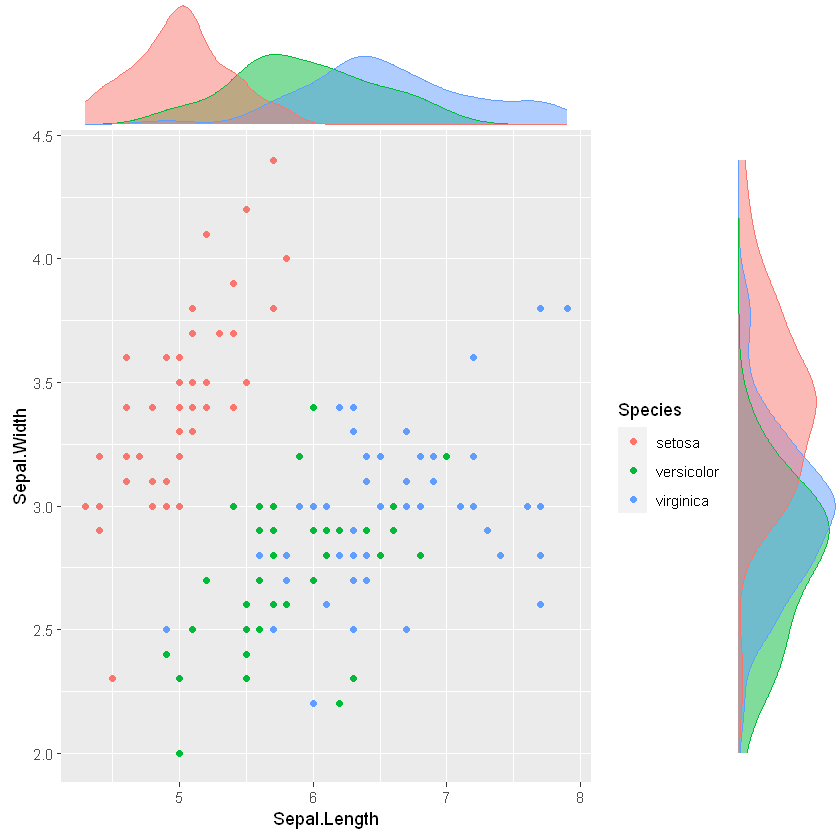

In [40]:
library("ggExtra")
library("ggplot2")

piris <- ggplot(iris, aes(Sepal.Length, Sepal.Width, colour = Species)) +
  geom_point()
ggMarginal(piris, groupColour = TRUE, groupFill = TRUE)

## geofacet

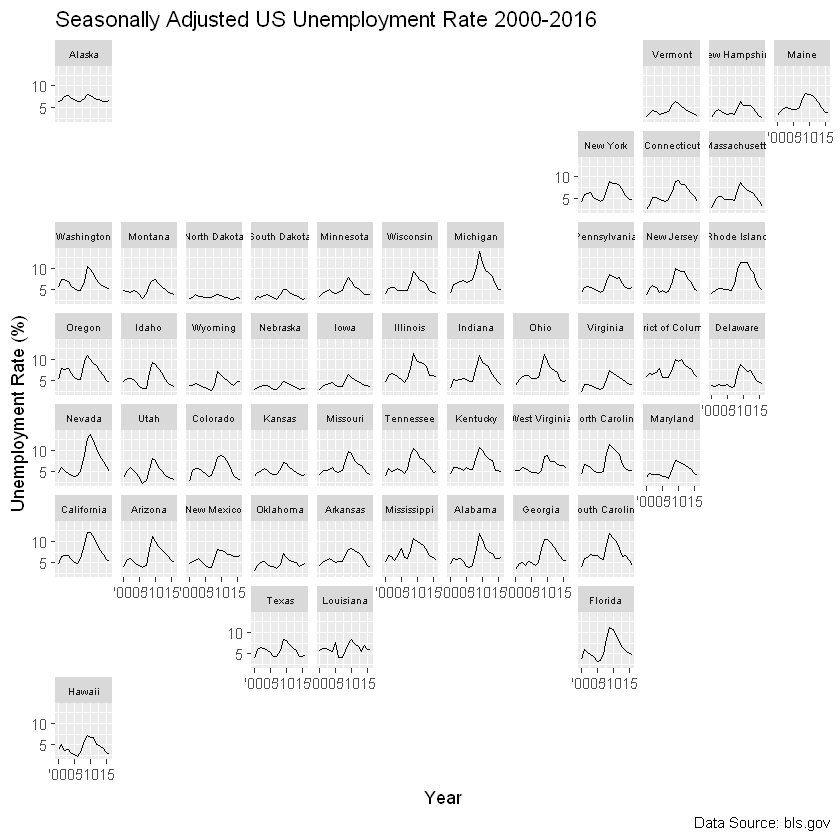

In [43]:
library(geofacet)

ggplot(state_unemp, aes(year, rate)) +
  geom_line() +
  facet_geo(~ state, grid = "us_state_grid2", label = "name") +
  scale_x_continuous(labels = function(x) paste0("'", substr(x, 3, 4))) +
  labs(title = "Seasonally Adjusted US Unemployment Rate 2000-2016",
    caption = "Data Source: bls.gov",
    x = "Year",
    y = "Unemployment Rate (%)") +
  theme(strip.text.x = element_text(size = 6))


# ggplot2主题

## [hrbrthemes](https://github.com/hrbrmstr/hrbrthemes)

In [45]:
library(hrbrthemes)
library(gcookbook)
library(tidyverse)

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x

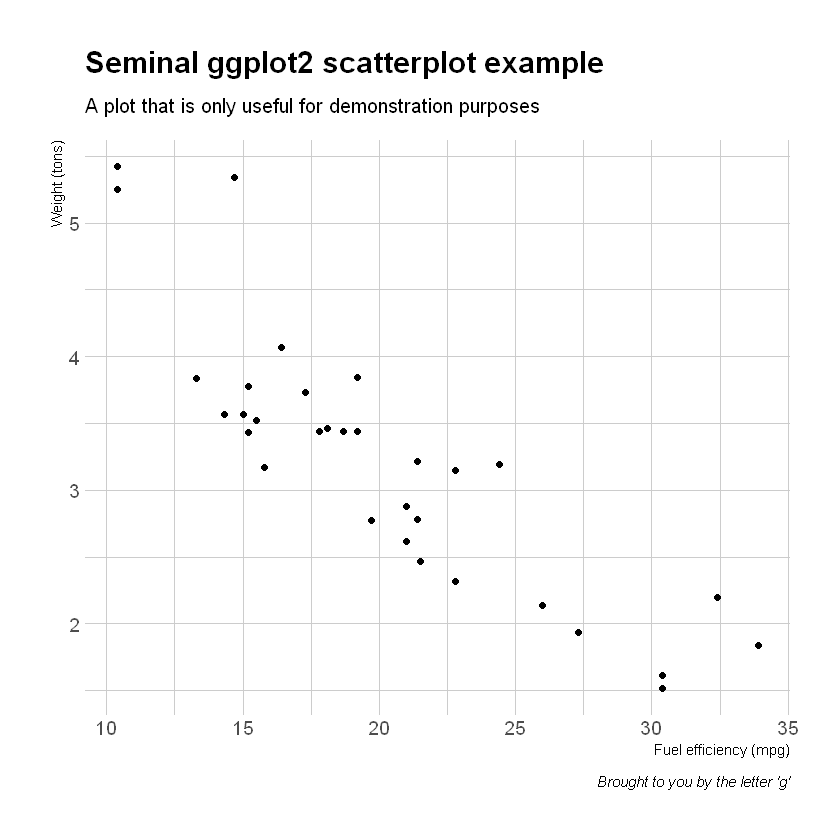

In [46]:
ggplot(mtcars, aes(mpg, wt)) +
  geom_point() +
  labs(x="Fuel efficiency (mpg)", y="Weight (tons)",
       title="Seminal ggplot2 scatterplot example",
       subtitle="A plot that is only useful for demonstration purposes",
       caption="Brought to you by the letter 'g'") + 
  theme_ipsum()

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x

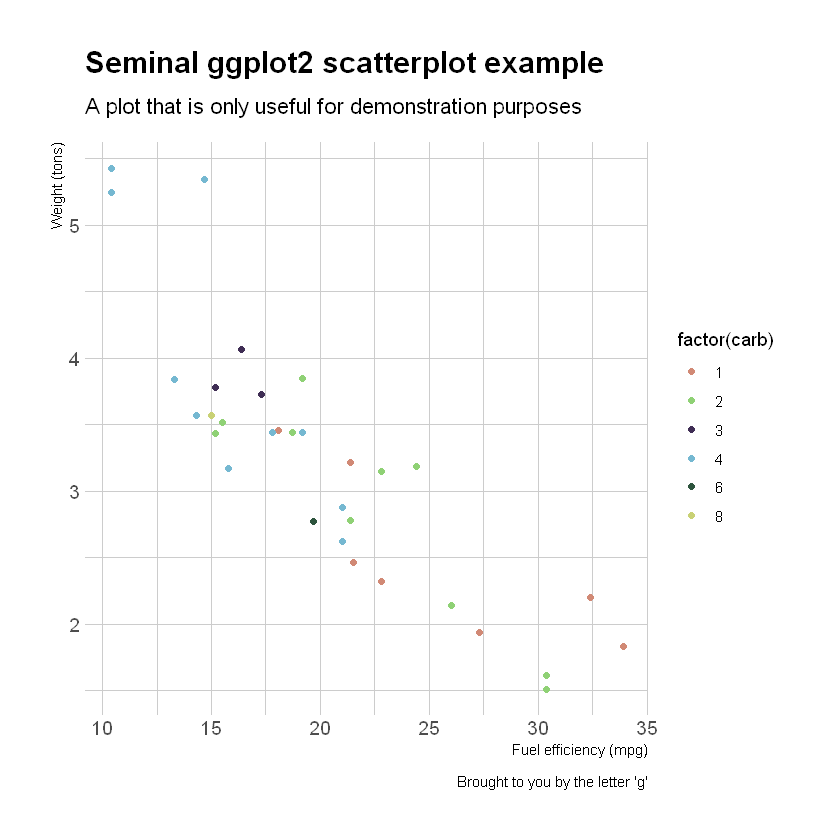

In [47]:
ggplot(mtcars, aes(mpg, wt)) +
  geom_point(aes(color=factor(carb))) +
  labs(x="Fuel efficiency (mpg)", y="Weight (tons)",
       title="Seminal ggplot2 scatterplot example",
       subtitle="A plot that is only useful for demonstration purposes",
       caption="Brought to you by the letter 'g'") + 
  scale_color_ipsum() +
  theme_ipsum_rc()

## [ggthemr](https://github.com/cttobin/ggthemr)

In [48]:
library(ggthemr)

## [ggsci](https://github.com/nanxstats/ggsci)

In [50]:
library("ggsci")
library("ggplot2")
library("gridExtra")

data("diamonds")

p1 <- ggplot(
  subset(diamonds, carat >= 2.2),
  aes(x = table, y = price, colour = cut)
) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "loess", alpha = 0.05, size = 1, span = 1) +
  theme_bw()

p2 <- ggplot(
  subset(diamonds, carat > 2.2 & depth > 55 & depth < 70),
  aes(x = depth, fill = cut)
) +
  geom_histogram(colour = "black", binwidth = 1, position = "dodge") +
  theme_bw()

`geom_smooth()` using formula 'y ~ x'



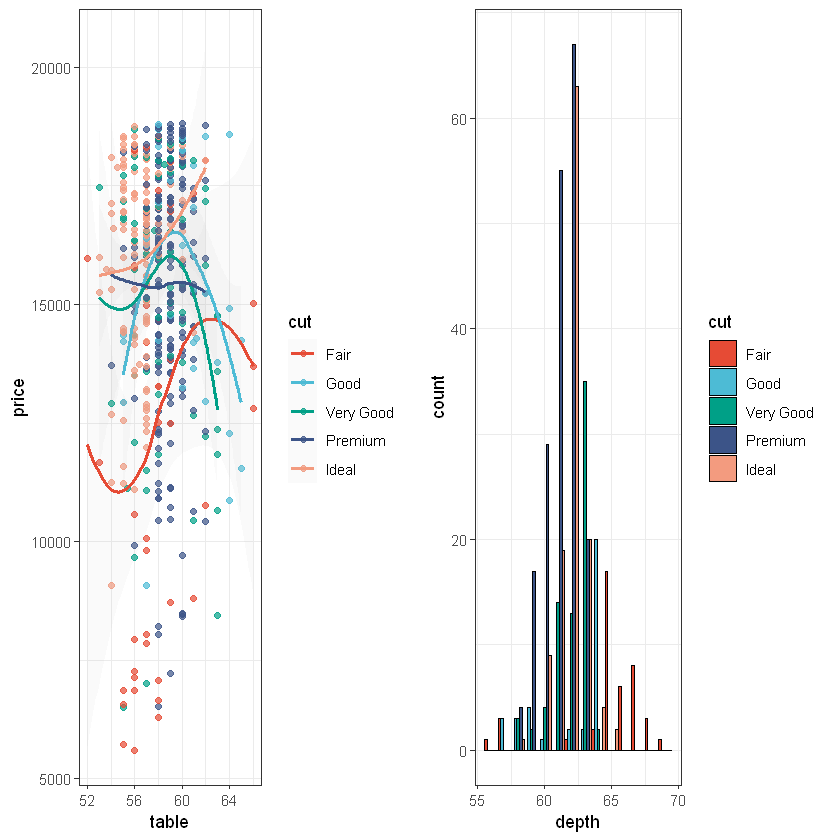

In [52]:
p1_npg <- p1 + scale_color_npg()
p2_npg <- p2 + scale_fill_npg()
grid.arrange(p1_npg, p2_npg, ncol = 2)